1.라이브러리 설치

In [3]:
%pip install numpy matplotlib torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 43.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 48.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 14.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 10.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 18.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━

In [15]:
#mnist 데이터를 불러오고 훈련 데이터와 테스트 데이터로 나누는 데 필요한 라이브러리 import
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# 데이터 변환
transform = transforms.Compose([
    transforms.ToTensor(), # 이미지를 텐서로 변환
    transforms.Normalize((0.5,), (0.5,)) # 이미지를 정규화
])

# Fashion-MNIST 데이터셋 불러오기
train_dataset = FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = FashionMNIST(root='./data', train=False, transform=transform, download=True)

# 데이터로더 설정
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



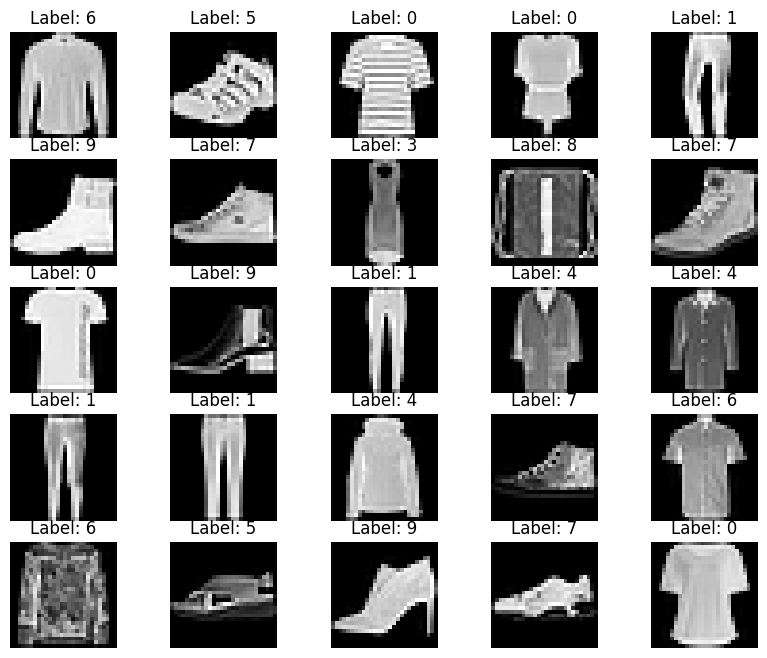

In [10]:
# 훈련 데이터의 이미지 데이터의 형태와 클래스 레이블 시각적으로 탐색
images, labels = next(iter(train_loader))

# 이미지 시각화
plt.figure(figsize=(10, 8))
for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(images[idx].numpy().squeeze(), cmap='gray')
    plt.title(f'Label: {labels[idx].item()}')
    plt.axis('off')
plt.show()


In [14]:
# CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(16 * 14 * 14, 10) # MNIST 데이터셋의 클래스 수는 10개

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 14 * 14) # 텐서를 펼쳐서 완전 연결 계층에 전달
        x = self.fc(x)
        return x

# 모델 생성
model = SimpleCNN()

# 손실 함수 및 옵티마이저 선택
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 훈련 데이터셋 및 데이터로더
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# 모델 훈련
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 100 == 99:    # 매 100 배치마다 손실 및 정확도 출력
            print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 100:.3f}, Accuracy: {100 * correct / total:.2f}%')
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

Epoch: 1, Batch: 100, Loss: 1.578, Accuracy: 58.52%
Epoch: 1, Batch: 200, Loss: 0.684, Accuracy: 84.33%
Epoch: 1, Batch: 300, Loss: 0.492, Accuracy: 87.48%
Epoch: 1, Batch: 400, Loss: 0.409, Accuracy: 88.91%
Epoch: 1, Batch: 500, Loss: 0.374, Accuracy: 89.75%
Epoch: 1, Batch: 600, Loss: 0.337, Accuracy: 90.59%
Epoch: 1, Batch: 700, Loss: 0.337, Accuracy: 90.41%
Epoch: 1, Batch: 800, Loss: 0.294, Accuracy: 91.84%
Epoch: 1, Batch: 900, Loss: 0.283, Accuracy: 91.97%
Epoch: 2, Batch: 100, Loss: 0.284, Accuracy: 91.73%
Epoch: 2, Batch: 200, Loss: 0.256, Accuracy: 92.41%
Epoch: 2, Batch: 300, Loss: 0.241, Accuracy: 93.31%
Epoch: 2, Batch: 400, Loss: 0.253, Accuracy: 92.88%
Epoch: 2, Batch: 500, Loss: 0.221, Accuracy: 93.75%
Epoch: 2, Batch: 600, Loss: 0.232, Accuracy: 93.33%
Epoch: 2, Batch: 700, Loss: 0.222, Accuracy: 93.83%
Epoch: 2, Batch: 800, Loss: 0.215, Accuracy: 94.06%
Epoch: 2, Batch: 900, Loss: 0.225, Accuracy: 93.17%
Epoch: 3, Batch: 100, Loss: 0.207, Accuracy: 94.16%
Epoch: 3, Ba

Accuracy of the network on the test images: 96.60%


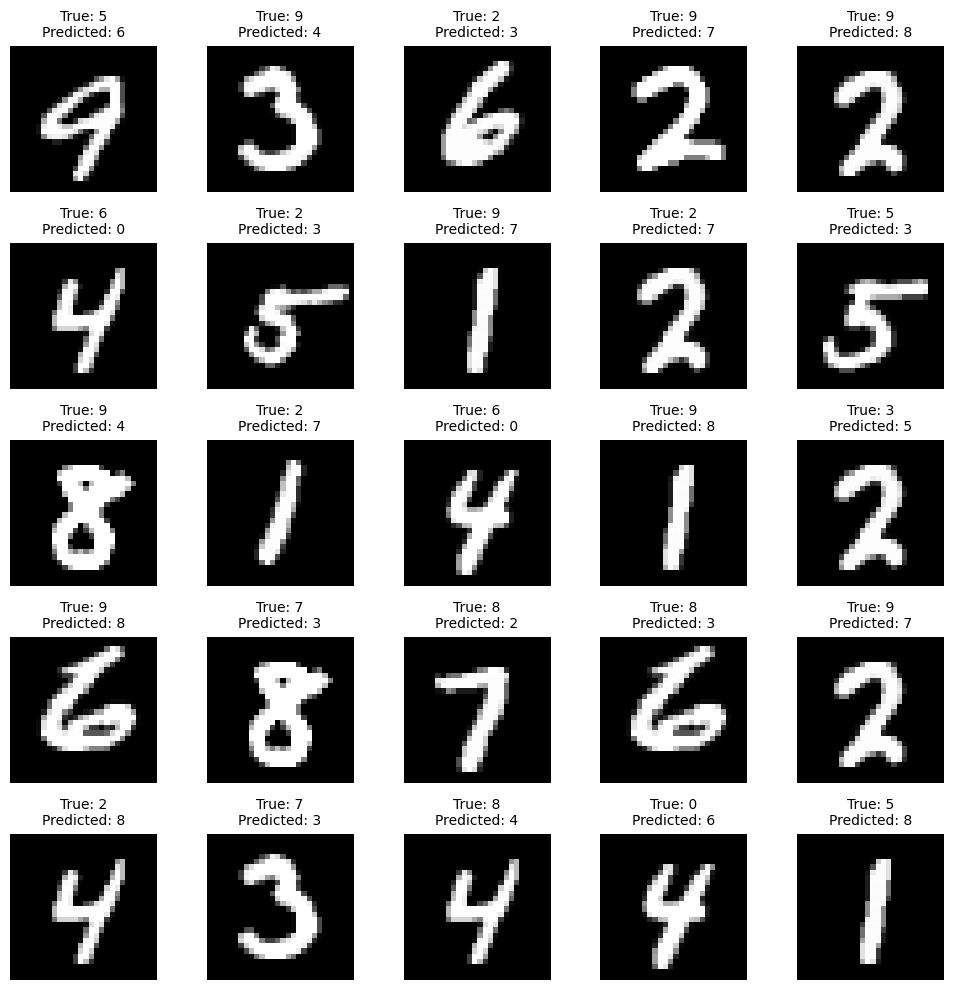

In [18]:
# 테스트 데이터셋 및 데이터로더
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 예측값과 정답을 저장할 리스트 초기화
predicted_list = []
true_list = []

# 모델 평가
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_list.extend(predicted.numpy())
        true_list.extend(labels.numpy())

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

# 잘못 분류된 이미지 시각화
plt.figure(figsize=(10, 10))
for idx, (image, true_label, predicted_label) in enumerate(misclassified_images[:25], 1):
    plt.subplot(5, 5, idx)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}', fontsize=10)
    plt.axis('off')
plt.tight_layout()  
plt.show()